In [1]:
import pandas as pd
from mikeio.eum import EUMType, ItemInfo
from fmskill.model import ModelResult
from fmskill.observation import TrackObservation
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# Extract track without having observation as dfs0

In [2]:
fn = '../tests/testdata/NorthSeaHD_and_windspeed.dfsu'
mr = ModelResult(fn, name='HD')
mr.dfs

Dfsu2D
Number of elements: 958
Number of nodes: 570
Projection: LONG/LAT
Items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Wind speed <Wind speed> (meter per sec)
Time: 67 steps with dt=3600.0s
      2017-10-27 00:00:00 -- 2017-10-29 18:00:00

In [3]:
fn = '../tests/testdata/altimetry_NorthSea_20171027.csv'
df = pd.read_csv(fn, index_col=0, parse_dates=True)

In [4]:
o1 = TrackObservation(df, item=2, name='alti')
o1.itemInfo = ItemInfo(EUMType.Surface_Elevation)    # if TrackObservation is created with a df, itemInfo needs to be added manually

In [5]:
mr.add_observation(o1, item=0)

In [6]:
cc = mr.extract()

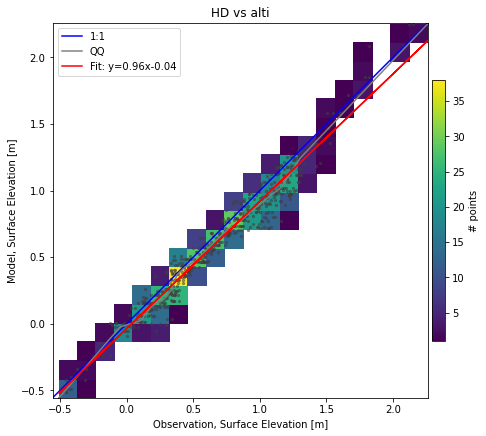

In [7]:
cc['alti'].scatter()

# Extract track from dfs0
ModelResult is now a dfs0

In [8]:
fn = '../tests/testdata/NorthSeaHD_extracted_track.dfs0'
mr = ModelResult(fn, name='HD')
mr.dfs

<mikeio.Dfs0>
Timeaxis: TimeAxisType.NonEquidistantCalendar
Items:
  0:  Longitude <Undefined> (undefined)
  1:  Latitude <Undefined> (undefined)
  2:  Model_surface_elevation <Undefined> (undefined)
  3:  Model_wind_speed <Undefined> (undefined)

In [9]:
fn = '../tests/testdata/altimetry_NorthSea_20171027.csv'
df = pd.read_csv(fn, index_col=0, parse_dates=True)
o1 = TrackObservation(df, item=2, name='alti')

In [10]:
mr.add_observation(o1, item=2)

In [11]:
cc = mr.extract()

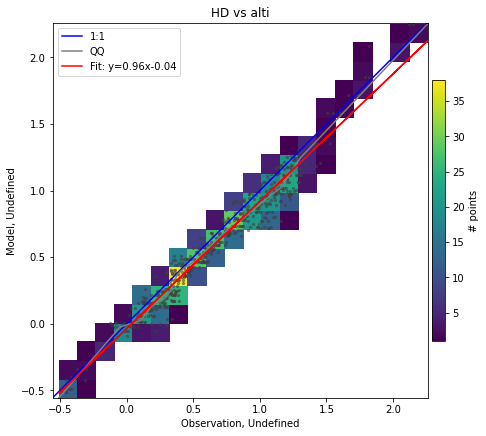

In [12]:
cc['alti'].scatter()